### Lego Data Project:

- This project includes a dataset that contains information about all the past legos that have been manufactured and sold with details of their theme, what year they were sold, how they're packaged, number of pieces and minifugures included, and rating from the Brickset members. Sophia (Lam) thought this theme would be perfect because of Sophia (Huang)'s love for legos and thought the information would be interesting to analyze.

- Link to data set: https://www.kaggle.com/datasets/willianoliveiragibin/lego-sets-and

# Research Questions:
- Has the average price of purchasing Legos increased over the years?
- Which year were the most Legos released?
- What is the most frequent theme?
- What is the least frequent theme?
- Which themes come with the most minifigures?
- Which themes come with the most pieces?

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
legos = pd.read_csv("sets.csv") #importing dataset
legos

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14931,854242-1,Creeper Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN
14932,854243-1,Steve Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN
14933,854244-1,Piglin Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN
14934,854245-1,Fennec Shand Key Chain,2023,Gear,Miscellaneous,Key Chains/Star Wars,Gear,Tag,0,LEGO exclusive,NaN,NaN,88.0,0.0,5.99,NaN,NaN


In [ ]:
legos2 = legos.copy() #making copy

#gets rid of unwanted columns
#we don't need these columns because they are not relevant to answer our research questions
legos2.drop(labels = ["Num_Instructions", "USD_MSRP", "Total_Quantity",
                      "Packaging", "Set_ID", "Subtheme"], axis = 1, inplace = True)

#gets rid of all categories but "normal"
good_category = ['Normal']
legos3 = legos2[legos2['Category'].isin(good_category)]
legos3

,Name,Year,Theme,Theme_Group,Category,Availability,Pieces,Minifigures,Owned,Rating,Current_Price
0,PreSchool Set,1975,PreSchool,Pre-school,Normal,{Not specified},16.0,NaN,10.0,0.0,NaN
1,PreSchool Set,1975,PreSchool,Pre-school,Normal,{Not specified},20.0,NaN,11.0,0.0,NaN
2,Pre-School Set,1975,Duplo,Pre-school,Normal,{Not specified},21.0,NaN,10.0,0.0,NaN
3,PreSchool Set,1975,PreSchool,Pre-school,Normal,{Not specified},32.0,NaN,8.0,0.0,NaN
4,Basic Set,1975,Samsonite,Vintage,Normal,{Not specified},330.0,NaN,10.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14903,Mei's Guardian Dragon,2023,Monkie Kid,Action/Adventure,Normal,Retail - limited,605.0,NaN,6.0,0.0,NaN
14904,The Mighty Azure Lion,2023,Monkie Kid,Action/Adventure,Normal,Retail - limited,789.0,NaN,6.0,0.0,NaN
14905,Dragon of the East Palace,2023,Monkie Kid,Action/Adventure,Normal,Retail - limited,2364.0,NaN,9.0,0.0,NaN
14906,Lunar New Year Display,2023,Seasonal,Miscellaneous,Normal,LEGO exclusive,872.0,NaN,1137.0,0.0,NaN


**Has the average price of purchasing Legos increased over the years?**

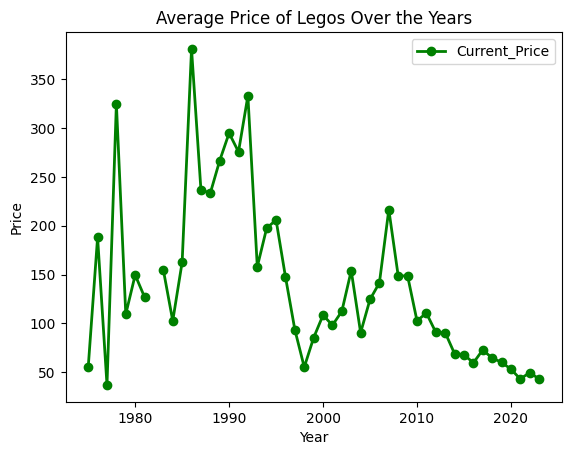

In [ ]:
#line graph with current_price and year
#average price of legos per year
#dataframe of year and average price that year
avg_price = legos3.groupby("Year")[["Current_Price"]].mean().reset_index()

#makes line graph
ax = avg_price.plot("Year", "Current_Price", title = "Average Price of Legos Over the Years", xlabel = "Year",
                  ylabel = "Price", marker = "o", color = "Green", linestyle = "-", linewidth = 2)
#shows line graph
plt.show()

    The average price of Legos have decreased over the years.

**Which year were the most Legos released?**

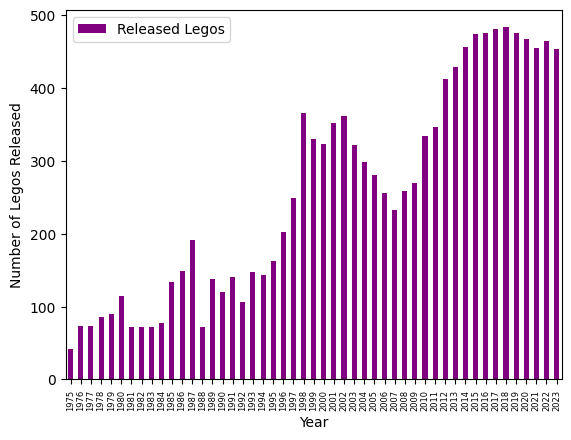

In [ ]:
#bar graph of year and theme

#counts number of legos released each year
released_lego = legos3["Year"].value_counts()

#makes a dataframe of the released legos
released_lego_df = released_lego.reset_index()
released_lego_df.columns = ['Year', 'Released Legos'] #makes year column and released legos column
released_lego_df.sort_values("Year", ascending = True, inplace = True) #sorts the columns based on year
released_lego_df

#makes bar graph
ax = released_lego_df.plot(kind = "bar", x = "Year", y = "Released Legos", ylabel = "Number of Legos Released", color = "Purple")
plt.tick_params(axis = 'x', labelsize = 6)
plt.show()

    The most Legos released was in 2018.

**What is the most frequent theme?**

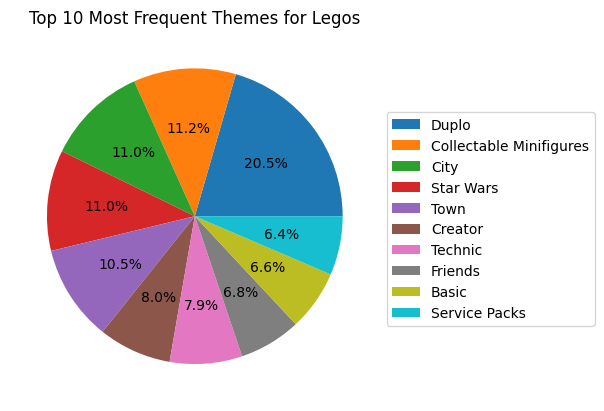

In [ ]:
#pie chart of theme count

#make dataframe of counts for each theme
themes = legos3["Theme"]
themes_amt = pd.DataFrame(themes.value_counts(). reset_index().values, columns = ["Themes", "Number"])
top_10 = themes_amt.head(10) #dataframe will only include the top 10 most frequent themes
top_10

#makes pie chart
fig, ax = plt.subplots()

legend = top_10["Themes"]
number = top_10["Number"]

ax.pie(number, autopct = '%1.1f%%')
ax.legend(legend, bbox_to_anchor = (1, .8)) #adds legend to pie chart
ax.set_title("Top 10 Most Frequent Themes for Legos") #sets title for figure
plt.show() #displays pie chart

    The most frequent theme is Duplo, followed by Collectable Minifigures, and then the City Theme.

**What is the least frequent theme?**

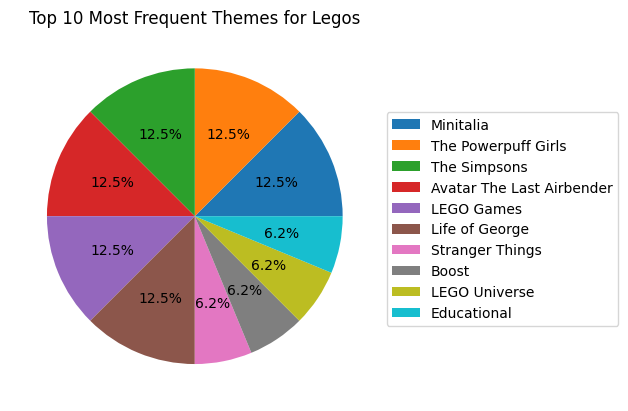

In [ ]:
#uses the dataframe from the previous question and makes a dataframe of the 10 least frequent themes
bottom_10 = themes_amt.tail(10)
bottom_10

#makes the pie chart
fig, ax = plt.subplots()

legend = bottom_10["Themes"]
number = bottom_10["Number"]

ax.pie(number, autopct = '%1.1f%%')
ax.legend(legend, bbox_to_anchor = (1, .8)) #adds legend to pie chart
ax.set_title("Top 10 Most Frequent Themes for Legos") #sets name for figure
plt.show() #displays pie chart

    The least frequent themes are Stranger Things, Boost, LEGO Universe, and Educational.

**Which themes come with the most minifigures?**

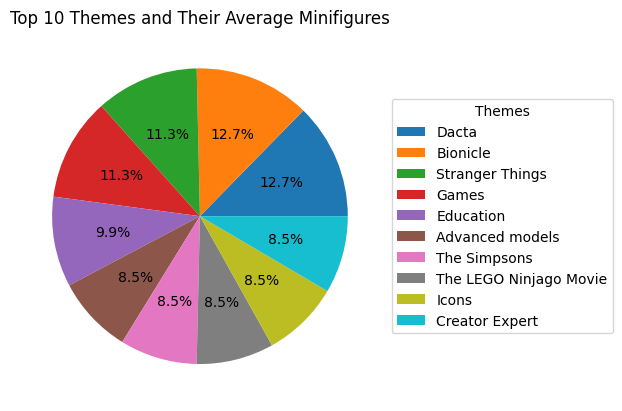

In [ ]:
#pie chart of theme and minifigures

#makes dataframe with themes and average number of minifigures for each theme
avg_minifigures = legos3.groupby("Theme")[["Minifigures"]].mean().round()

#sorts the highest number of minifigures so that it is at the beginning of dataframe
avg_minifigures.sort_values("Minifigures", ascending = False, inplace = True)

#dataframe of just the top 10 themes with the most minifigures
minifigures_10 = avg_minifigures.head(10)

#makes the pie chart with the minifigures_10 dataframe
fig, ax = plt.subplots()
ax.pie(minifigures_10["Minifigures"], autopct = '%1.1f%%')
ax.set_title("Top 10 Themes and Their Average Minifigures") #sets title for figure

#adds legend, changes title of the legend to 'Themes', specifies and adjusts positions
ax.legend(minifigures_10.index, title = "Themes", loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

    Dacta and Bionicle are the themes with the most minifigures.

**Which themes come with the most pieces?**

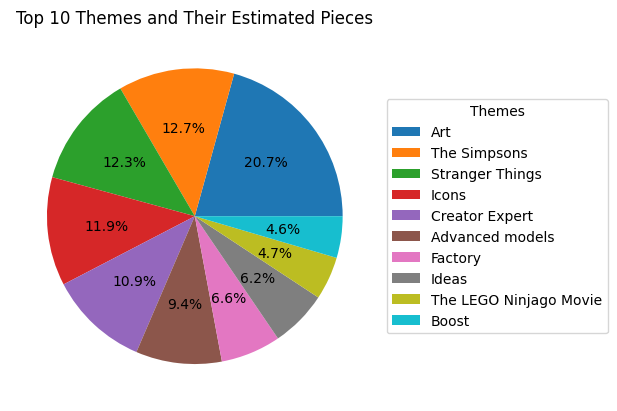

In [ ]:
#pie chart of theme and pieces

#makes dataframe with themes and average number of pieces for each theme
avg_pieces = legos3.groupby("Theme")[["Pieces"]].mean().round()

#sorts the highest number of pieces so that it is at the beginning of dataframe
avg_pieces.sort_values("Pieces", ascending = False, inplace = True)

#dataframe of just the top 10 themes with the most pieces
themes_10 = avg_pieces.head(10)

#makes the pie chart with the themes_10 dataframe
fig, ax = plt.subplots()
ax.pie(themes_10["Pieces"], autopct = '%1.1f%%')
ax.set_title("Top 10 Themes and Their Estimated Pieces") #sets title for figure

#adds legend, changes title of the legend to 'Themes', specifies and adjusts positions
ax.legend(themes_10.index, title = "Themes", loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

    The Art theme has the most average pieces.


# Conclusion:

- When analyzing the data, we created 6 figures to answer the original research questions. With a line graph, we found that the average price of Legos have decreased over the years. The most Legos were found to be released in 2018 which was found through a bar graph. Through pie charts we were able to find the most frequent themes and which respective themes had the most minifigures and pieces. It was found that the most frequent theme was Duplo and the least frequent was Stranger themes, tied with Boost, LEGO Universal, and Educational. The themes that came with the most minifgures was Dact and Bionical and the Art theme sets came with the most pieces (averaged).


**References:**
- https://saturncloud.io/blog/how-to-select-rows-from-a-dataframe-based-on-list-values-in-a-column-in-pandas/#:~:text=To%20select%20rows%20from%20a%20DataFrame%20based%20on%20a%20list,to%20select%20the%20desired%20rows.
- https://stackoverflow.com/questions/52523710/increase-spacing-between-points-on-x-axis